In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import tensorflow as tf
from numpy.random import seed
import random as rn
rn.seed(12)
seed(12)
tf.compat.v1.set_random_seed(12)
seed(1)
tf.random.set_seed(12)

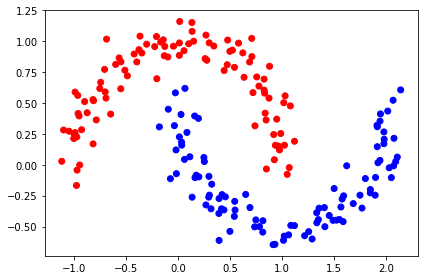

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors, get_accuracy

X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [6]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from keras.optimizers import SGD
# SGD is the learning algorithm we will use

In [7]:
perceptron = Sequential()
perceptron.add(Dense(1,input_dim = 2, activation="sigmoid"))# dtype='float64'

In [8]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

In [9]:
perceptron.fit(X_train, y_train, epochs=20)

Epoch 1/20
5/5 [==============================] - 2s 3ms/step - loss: 0.6298
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6282
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6237
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6236
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6169
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6233
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6150
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6107
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6053
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6003
Epoch 11/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5949
Epoch 12/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5920
Epoch 13/20
5/5 [==============================] - 0s 3ms/step - loss: 0.

In [10]:
# def accuracy(y, y_preds):
#     """
#     Return accuracy, which is (TP+TN)/(TP+FP+FN+TN)
#     """
#     TP = 0
#     TN = 0
#     for i in range(len(y_preds)):
#         if y_preds[i] == y[i] == 1:

#             TP += 1
#         elif y_preds[i] == y[i] ==  0:
#             TN += 1
#     return((TP+TN)/(len(y_preds)))
    
# def cal_accuracy(model, x, y):
#     pred = model.predict_classes(x)
#     return accuracy(y, pred)

from sklearn.metrics import accuracy_score

print(f'Training accuracy is {accuracy_score(y_train, perceptron.predict_classes(X_train))}')
print(f'Testing accuracy is {accuracy_score(y_test, perceptron.predict_classes(X_test))}')

Training accuracy is 0.86875
Testing accuracy is 0.925


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [11]:
perceptron.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(18.75, 0.5, 'Test')

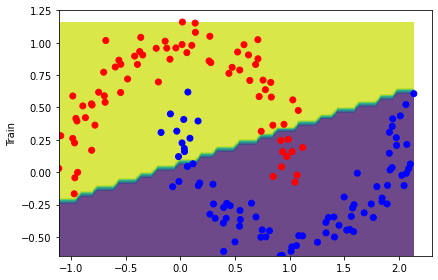

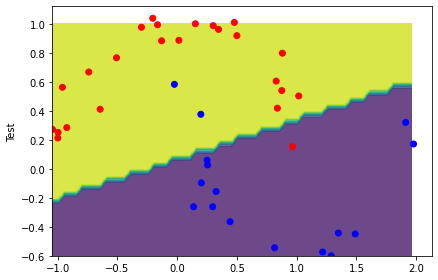

In [12]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

In [13]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
# We will go over specific activation functions throughout the class.
from keras.layers import Dense
# SGD is the learning algorithm we will use
from keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
def build_one_output_model():
    model = Sequential()

    # Add a input hidden layer with appropriate input dimension
    model.add(Dense(2, input_dim = 2, activation="relu"))

    # Add a final output layer with 1 unit 
    model.add(Dense(1, activation="sigmoid"))

    sgd = SGD(lr=0.001, decay=1e-7, momentum=0.9)  #Stochastic gradient descent
    model.compile(loss="binary_crossentropy", optimizer=sgd)
    return model

In [15]:
model = build_one_output_model()

In [16]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6659
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6671
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6580
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6637
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6580
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6643
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6585
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6587
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6548
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6592
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6557
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6545
Epoch 13/50
5/5 [==============================] - 0s 2ms/step - loss: 0.

Q3. Compute accuracy (Please do not use get_accuracy())

In [17]:
print(f'Training accuracy is {accuracy_score(y_train, model.predict_classes(X_train))}')
print(f'Testing accuracy is {accuracy_score(y_test, model.predict_classes(X_test))}')

Training accuracy is 0.8375
Testing accuracy is 0.85


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(18.75, 0.5, 'Test')

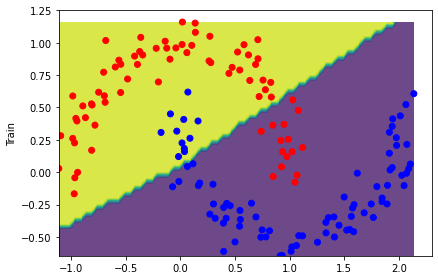

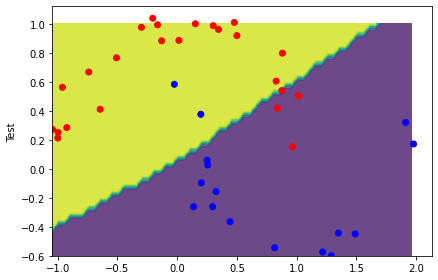

In [18]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

In [19]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)
# y_test_vectorized = to_categorical(y_test)

In [20]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]


In [21]:
def build_classification_model():
    model = Sequential()
    
    # First add a fully-connected (Dense) hidden layer with appropriate input dimension
    model.add(Dense(10, input_dim = 2, activation="relu"))

    # Now our second hidden layer 
    model.add(Dense(5, activation="relu"))

    # Finally, add a readout layer
    model.add(Dense(2, activation="softmax"))

    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd, metrics=["accuracy"])
    return model

In [22]:
model = build_classification_model()

In [23]:
model.fit(X_train, y_train_vectorized, epochs=2000)

Epoch 1/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.5981
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6347
Epoch 3/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.5909
Epoch 4/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.5996
Epoch 5/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.5761 - accuracy: 0.6060
Epoch 6/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7591
Epoch 7/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7602
Epoch 8/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7545
Epoch 9/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7632
Epoch 10/2000
5/5 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7854
Epoch 11/2000
5/5 [

In [24]:
# Print out accuracy
print(f'Training accuracy is {get_accuracy(model, X_train, y_train)}')
print(f'Testing accuracy is {get_accuracy(model, X_test, y_test)}')

Training accuracy is 1.0
Testing accuracy is 1.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(18.75, 0.5, 'Test')

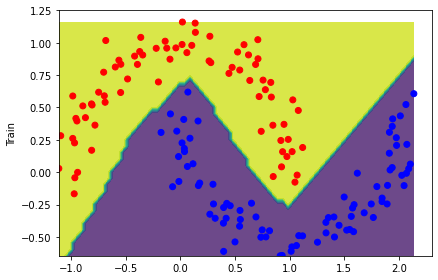

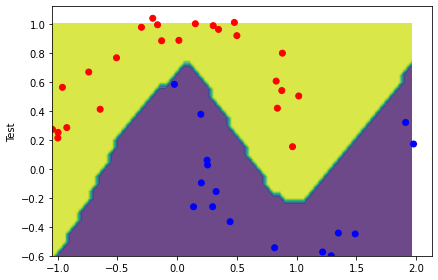

In [25]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

In [52]:
# Load your training data set and test data
df_train = pd.read_csv("income.csv")
X_test = pd.read_csv("income_Xtest.csv")

# Clean the dataset: remove the rows with " ?"
df_train = df_train.replace(" ?", np.nan).dropna()
X_test = X_test.replace(" ?", np.nan).dropna()

# Split data into X and y
X = df_train.drop('income', axis = 1)
y = df_train['income']
#Apply standardization to continuous values and one-hot encoding
from sklearn.preprocessing import StandardScaler
numerical = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
scaler = StandardScaler().fit(X[numerical])

X_scaled = scaler.transform(X[numerical])
X_test_scaled = scaler.transform(X_test[numerical])

X_scaled = pd.DataFrame(X_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

from sklearn.preprocessing import OneHotEncoder
categorical = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
enc = OneHotEncoder().fit(X[categorical])

X_ohe = enc.transform(X[categorical]).toarray()
X_test_ohe = enc.transform(X_test[categorical]).toarray()

X_ohe = pd.DataFrame(X_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe)

#one-hot encoding

y = pd.get_dummies(y).iloc[:,1]
# #y = to_categorical(y)
# y = pd.DataFrame(y)

X = pd.concat([X_scaled,X_ohe],axis = 1)
X_test = pd.concat([X_test_scaled,X_test_ohe],axis = 1)
######################
# # Split data into training and validation set
X_train = X.iloc[:2800,:]
y_train = y.iloc[:2800]
X_val = X.iloc[2800:,:]
y_val = y.iloc[2800:]

In [27]:
y_train_vectorized = to_categorical(y_train)

In [28]:
# Print out the shape of X_train
X_train.shape

(2800, 102)

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

In [31]:
# def create_model(neurons, activation):
#     model = Sequential()
#     model.add(Dense(10, input_dim = X_train.shape[1], activation="relu"))
#     model.add(Dense(neurons, activation=activation))
#     model.add(Dense(2, activation="softmax")) 
#     sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
#     model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
#     return model
    
# model = KerasClassifier(build_fn=create_model, verbose=0)

In [32]:
# # layers = [[20], [40, 20], [45, 30, 15]
# param_grid = {"neurons" : [3,5,7,9,11,13], "activation": ['sigmoid', 'relu']}
# grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [33]:
# grid_result = grid.fit(X_train, y_train_vectorized)

In [34]:
# grid.best_params_


In [35]:
def build_final_model():
    model = Sequential()
    model.add(Dense(100, input_dim = 102, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(80, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(40, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation="softmax")) 

    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    return model

In [36]:
final_model = build_final_model()
final_model.fit(X_train, y_train_vectorized, epochs=200)

Epoch 1/200
88/88 [==============================] - 1s 3ms/step - loss: 0.6467 - accuracy: 0.5772
Epoch 2/200
88/88 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.9465
Epoch 3/200
88/88 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9519
Epoch 4/200
88/88 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9515
Epoch 5/200
88/88 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9452
Epoch 6/200
88/88 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9513
Epoch 7/200
88/88 [==============================] - 0s 3ms/step - loss: 0.1924 - accuracy: 0.9484
Epoch 8/200
88/88 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9466
Epoch 9/200
88/88 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.9451
Epoch 10/200
88/88 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9475
Epoch 11/

In [37]:
get_accuracy(final_model, X_val, y_val)

0.7774140752864157

In [38]:
from sklearn.metrics import accuracy_score,precision_score, recall_score
#obtain predictions on validation set 
final_model_pred = final_model.predict_classes(X_val)
# Print accuracy,precision,recall 
print(f"Accuracy on train is {accuracy_score(y_val, final_model_pred)}\n")
print(f"Precision on train is {precision_score(y_val, final_model_pred)}\n")
print(f"Recall on train is {recall_score(y_val, final_model_pred)}\n")

Accuracy on train is 0.7774140752864157

Precision on train is 0.8888888888888888

Recall on train is 0.2696629213483146



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


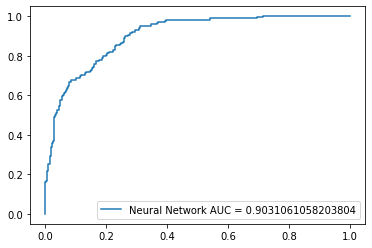

In [39]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

lr_probs = final_model.predict_proba(X_val)
lr_probs = lr_probs[:, 1]
lr_auc = metrics.roc_auc_score(y_val, lr_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_val, lr_probs)
plt.plot(lr_fpr, lr_tpr, label="Neural Network AUC = "+str(lr_auc))
plt.legend(loc=4) 

In [40]:
# load the dataset again to drop first columns for ohe

# df_train = pd.read_csv("income.csv")
X_test = pd.read_csv("income_Xtest.csv")


# # Clean the dataset: remove the rows with " ?"
# df_train = df_train.replace(" ?", np.nan).dropna()
X_test = X_test.replace(" ?", np.nan).dropna()

# # Split data into X and y
X = df_train.drop('income', axis = 1)
y = df_train['income']

enc = OneHotEncoder(drop="first").fit(X[categorical])

X_ohe = enc.transform(X[categorical]).toarray()
X_test_ohe = enc.transform(X_test[categorical]).toarray()

X_ohe = pd.DataFrame(X_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe)

X = pd.concat([X_scaled,X_ohe],axis = 1)
X_test = pd.concat([X_test_scaled,X_test_ohe],axis = 1)

y = pd.get_dummies(y).iloc[:,1]
y = pd.DataFrame(y)

X_train = X.iloc[:2800,:]
y_train = y.iloc[:2800,:]
X_val = X.iloc[2800:,:]
y_val = y.iloc[2800:,:]

In [41]:
from sklearn.linear_model import LogisticRegression
def logistic_regression_model(X_train, y_train):
    param_grid = {
    'penalty': ['l1','l2'],
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
    }
    lr = LogisticRegression(random_state=26)
    grid_search = GridSearchCV(estimator = lr, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 
    grid_search.fit(X_train, y_train)
    return grid_search

In [42]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall
grid_search_lr = logistic_regression_model(X_train, y_train.values.ravel())

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.9s finished


In [43]:
grid_search_lr.best_params_

{'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'liblinear'}

In [45]:
grid_pred = pd.DataFrame(grid_search_lr.predict(X_val), columns={"y_pred"})
print(f"Accuracy on train is {accuracy_score(y_val, grid_pred)}\n")
print(f"Precision on train is {precision_score(y_val, grid_pred)}\n")
print(f"Recall on train is {recall_score(y_val, grid_pred)}\n")

Accuracy on train is 0.7610474631751227

Precision on train is 0.82

Recall on train is 0.2303370786516854



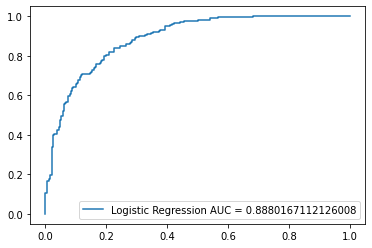

In [46]:
lr_probs = grid_search_lr.predict_proba(X_val)
lr_probs = lr_probs[:, 1]
lr_auc = metrics.roc_auc_score(y_val, lr_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_val, lr_probs)
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression AUC = "+str(lr_auc))
plt.legend(loc=4) 

In [47]:
from sklearn.ensemble import RandomForestClassifier
def random_forest_model(X_train, y_train):
    # param_grid = {
    # 'max_depth': [20, 40, 60, 80],
    # 'max_features': ['auto','sqrt'],
    # 'min_samples_leaf': [2,4],
    # 'min_samples_split': [2,4],
    # 'n_estimators': [200, 400]
    # }
    param_grid = {
    'max_depth': [10, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 5, 7, 9],
    'min_samples_split': [20, 30, 40, 50, 60],
    'n_estimators': [10, 20, 30]}
    rf = RandomForestClassifier(random_state=26)
    grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 
    grid_search.fit(X_train, y_train)
    return grid_search

In [48]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall
grid_search_rf = random_forest_model(X_train, y_train.values.ravel())

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   47.7s finished


In [49]:
grid_search_rf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 30,
 'n_estimators': 10}

In [50]:
grid_pred = pd.DataFrame(grid_search_rf.predict(X_val), columns={"y_pred"})
print(f"Accuracy on train is {accuracy_score(y_val, grid_pred)}\n")
print(f"Precision on train is {precision_score(y_val, grid_pred)}\n")
print(f"Recall on train is {recall_score(y_val, grid_pred)}\n")

Accuracy on train is 0.7675941080196399

Precision on train is 0.95

Recall on train is 0.21348314606741572



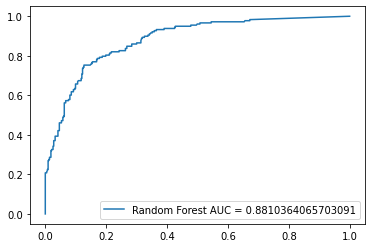

In [51]:
lr_probs = grid_search_rf.predict_proba(X_val)
lr_probs = lr_probs[:, 1]
lr_auc = metrics.roc_auc_score(y_val, lr_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_val, lr_probs)

plt.plot(lr_fpr, lr_tpr, label="Random Forest AUC = "+str(lr_auc))
plt.legend(loc=4) 

In [53]:
y_pred = final_model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [55]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [56]:
print(x_train.shape)

(60000, 28, 28)


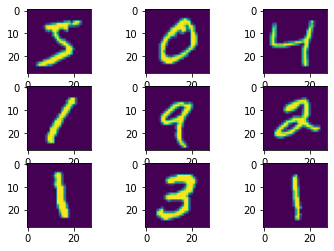

In [57]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

In [58]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [60]:
y_train_vectorized = to_categorical(y_train)
y_test_vectorized = to_categorical(y_test)

In [61]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
# neurons = 1
def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (5,5) ,input_shape = (28, 28, 1), activation='relu'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Conv2D(64, kernel_size = (5,5) , activation='relu'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model
#cnn_model = KerasClassifier(build_fn=build_cnn_model, verbose=0)

In [62]:
# neurons = [3,5,7,9,11,13,15]
# for i in neurons: 
#   print(i)
#   model = build_cnn_model(neurons = i) 

In [63]:
cnn_model =  build_cnn_model()
cnn_model.fit(x_train, y_train_vectorized, batch_size = 50, epochs = 15)

Epoch 1/15
1200/1200 [==============================] - 9s 3ms/step - loss: 0.3363 - accuracy: 0.9001
Epoch 2/15
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 3/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9907
Epoch 4/15
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0203 - accuracy: 0.9932
Epoch 5/15
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0161 - accuracy: 0.9946
Epoch 6/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 7/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 8/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0081 - accuracy: 0.9971
Epoch 9/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 10/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.007

In [64]:
cnn_model.evaluate(x_test, y_test_vectorized)

313/313 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9911


[0.050001878291368484, 0.991100013256073]

In [65]:
def build_mlp_model():
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [66]:
mlp_model = build_mlp_model()
mlp_model.fit(x_train, y_train_vectorized,  batch_size = 50, epochs = 15)

Epoch 1/15
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4523 - accuracy: 0.8719
Epoch 2/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.1079 - accuracy: 0.9672
Epoch 3/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0739 - accuracy: 0.9769
Epoch 4/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0489 - accuracy: 0.9841
Epoch 5/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0404 - accuracy: 0.9872
Epoch 6/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 7/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 8/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0206 - accuracy: 0.9931
Epoch 9/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 10/15
1200/1200 [==============================] - 2s 2ms/step - loss: 0.017

In [67]:
### YOUR CODE HERE ###
mlp_model.evaluate(x_test, y_test_vectorized)

313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9810


[0.09111824631690979, 0.9810000061988831]

In [69]:
from keras.models import Model
from keras.layers import Reshape, Input
# encoder layers
encoding_dim = 4
encoded = Sequential()
encoded.add(Flatten())
encoded.add(Dense(512))
encoded.add(Dense(256))
encoded.add(Dense(128))
encoded.add(Dense(encoding_dim))

######################

# decoder layers
decoded = Sequential()
decoded.add(Dense(128,activation='relu'))
decoded.add(Dense(256,activation='relu'))
decoded.add(Dense(512,activation='relu'))
decoded.add(Dense(784,activation='relu'))
decoded.add(Reshape((28, 28), input_shape = x_train[1:]))


######################

input_x = Input(shape=(28, 28, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

In [70]:
### YOUR CODE HERE ###
autoencoder.fit(x_train, x_train, batch_size = 100, epochs = 200)

Epoch 1/200
600/600 [==============================] - 2s 2ms/step - loss: 0.0508
Epoch 2/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0378
Epoch 3/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0363
Epoch 4/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0356
Epoch 5/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0351
Epoch 6/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0347
Epoch 7/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0345
Epoch 8/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0342
Epoch 9/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0341
Epoch 10/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0338
Epoch 11/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0335
Epoch 12/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0335
Epoch 13/200


In [71]:
# Test your autoencoder on test set, print out the MSE
print("MSE on test set is:", autoencoder.evaluate(x_test, x_test, verbose = 0))

######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

MSE on test set is: 0.034377820789813995


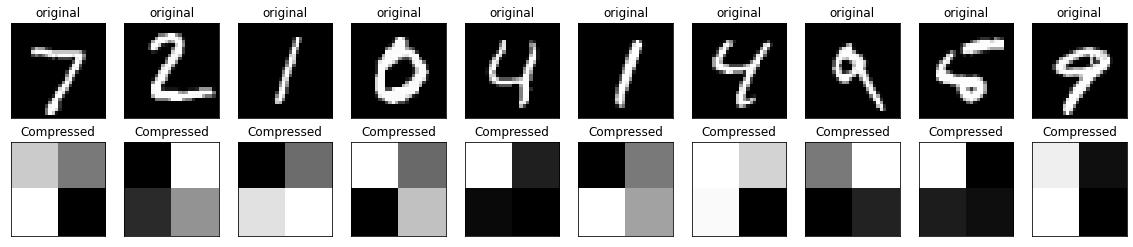

In [72]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

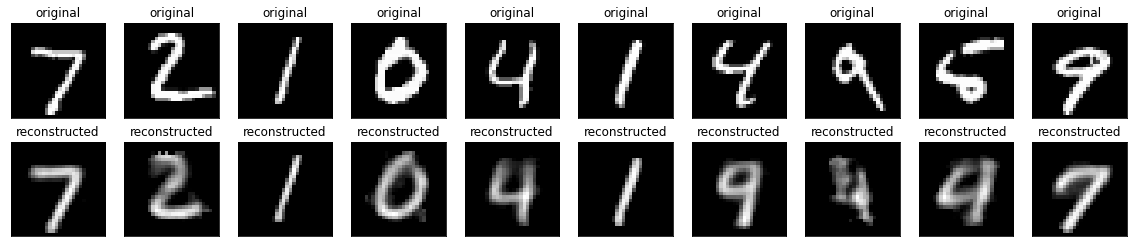

In [73]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [74]:
# Add some white noise into the original MNIST images
import numpy as np
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

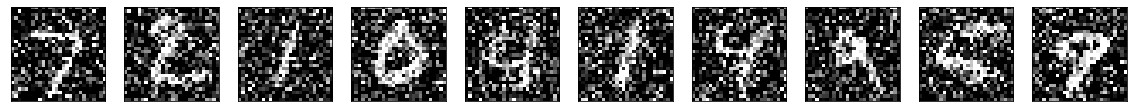

In [75]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [76]:
from keras.layers import UpSampling2D
# encoder layers
encoded = Sequential()
# You don't need to build a new function, just add the layers
encoded.add(Conv2D(64, kernel_size = (3,3),padding= 'same', input_shape = (28,28,1),activation='relu' ))
encoded.add(MaxPool2D(pool_size = (2, 2)))
encoded.add(Conv2D(32, kernel_size = (3,3), padding= 'same', activation='relu'))
encoded.add(MaxPool2D(pool_size = (2, 2)))


######################

# decoder layers
decoded = Sequential()
decoded.add(Conv2D(32, kernel_size = (3,3), activation='relu', padding= 'same'))
decoded.add(UpSampling2D((2,2)))
decoded.add(Conv2D(64, kernel_size = (3,3), activation='relu', padding= 'same'))
decoded.add(UpSampling2D((2,2)))
decoded.add(Conv2D(1, kernel_size = (3,3), activation='relu', padding= 'same'))
decoded.add(Reshape((28, 28), input_shape = x_train[1:]))
######################

input_x = Input(shape=(28, 28, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [77]:
autoencoder.fit(x_train_noisy, x_train, batch_size = 100, epochs = 200)

Epoch 1/200
600/600 [==============================] - 4s 7ms/step - loss: 1.0392
Epoch 2/200
600/600 [==============================] - 4s 6ms/step - loss: 0.3364
Epoch 3/200
600/600 [==============================] - 4s 7ms/step - loss: 0.3052
Epoch 4/200
600/600 [==============================] - 4s 7ms/step - loss: 0.2789
Epoch 5/200
600/600 [==============================] - 4s 7ms/step - loss: 0.2591
Epoch 6/200
600/600 [==============================] - 4s 7ms/step - loss: 0.2437
Epoch 7/200
600/600 [==============================] - 4s 7ms/step - loss: 0.2295
Epoch 8/200
600/600 [==============================] - 4s 7ms/step - loss: 0.2198
Epoch 9/200
600/600 [==============================] - 4s 7ms/step - loss: 0.2127
Epoch 10/200
600/600 [==============================] - 4s 7ms/step - loss: 0.2076
Epoch 11/200
600/600 [==============================] - 4s 7ms/step - loss: 0.2030
Epoch 12/200
600/600 [==============================] - 4s 7ms/step - loss: 0.1995
Epoch 13/200


In [78]:
print("Entropy loss on test set is:", autoencoder.evaluate(x_test, x_test, verbose = 0))

Entropy loss on test set is: 0.13742120563983917


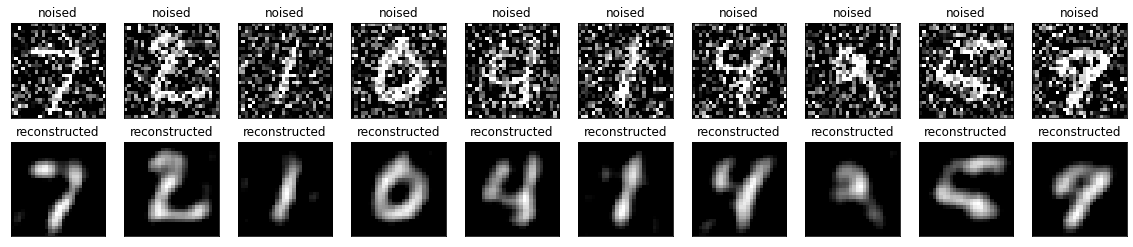

In [79]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("noised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()